# Тема “Обучение с учителем”

## Задание 1
- Импортируйте библиотеки pandas и numpy.
- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
- Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.
- Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.
- Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [25]:
# Импортируйте библиотеки pandas и numpy.
import numpy as np
import pandas as pd

In [26]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston

In [27]:
# Создайте датафреймы X и y из этих данных.
boston = load_boston()
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [29]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [30]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
#  Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [32]:
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
from sklearn.linear_model import LinearRegression

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = lr.predict(X_test)
y_pred.shape

(152, 1)

In [34]:
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7112260057484974

## Задание 2
- Создайте модель под названием model с помощью RandomForestRegressor из модуля
sklearn.ensemble.
- Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values [:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [35]:
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=12, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=1000  # кол-во деревьев
                                 )

In [36]:
#  Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values [:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

rf_model.fit(X_train, y_train.values [:, 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [37]:
y_test_preds = rf_model.predict(X_test)
y_test_preds.shape

(152,)

In [38]:
r2_score(y_test, y_test_preds)

0.7207632345916866

### *В нашем случае модель RandomForestRegressor показала чуть лучший результат чем модель LinearRegression, об этом нам говорит более высокий коэффициент детерминации R2.*

## *Задание 3
- Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
- С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [39]:
np.sum(rf_model.feature_importances_)

1.0

In [40]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                        rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.head(2)

,feature_name,importance
12,LSTAT,0.533689
5,RM,0.435824


## *Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию
по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать
задачу классификации - будем определять,какие из транзакциции по кредитной карте являются
мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества
относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать
лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка
несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет
ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы
датафрейма:

- pd.options.display.max_columns = 100.
- Просмотрите первые 10 строк датафрейма df.
- Создайте датафрейм X из датафрейма df, исключив столбец Class.
- Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
используя аргументы: 
- test_size=0.3, random_state=100, stratify=y.
- У вас должны получиться объекты X_train, X_test, y_train и y_test.
- Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:
- parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
- estimator=RandomForestClassifier(random_state=100),
- param_grid=parameters,
- scoring='roc_auc',
- cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).
- Просмотрите параметры лучшей модели с помощью атрибута best_params_.
- Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
- Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и
- запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
- Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных,
используя в качестве аргументов массивы y_test и y_pred_proba.


In [41]:
# Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
#import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100

In [42]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [43]:
#Загрузите датасет creditcard.csv и создайте датафрейм df.
df = pd.read_csv("creditcard.csv")
df = reduce_mem_usage(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 32.87 MB
Decreased by 51.2%


In [44]:
#С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [45]:
#Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

In [46]:
#Просмотрите первые 10 строк датафрейма df.
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686132,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.199997,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


In [47]:
#Создайте датафрейм X из датафрейма df, исключив столбец Class.
X = df.drop('Class',axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790001
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329283,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.879997
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000


In [48]:
#Создайте объект Series под названием y из столбца Class.
y = pd.Series(df['Class'])
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [49]:
#Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы:
#test_size=0.3, random_state=100, stratify=y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [50]:
#У вас должны получиться объекты X_train, X_test, y_train и y_test.
#Просмотрите информацию о их форме.
print(f"Форма X_train: {X_train.shape}")
print(f"Форма y_train: {y_train.shape}")
print(f"Форма X_test: {X_test.shape}")
print(f"Форма y_test: {y_test.shape}")

Форма X_train: (199364, 30)
Форма y_train: (199364,)
Форма X_test: (85443, 30)
Форма y_test: (85443,)


In [51]:
#Для поиска по сетке параметров задайте такие параметры: 
parameters = [{
    'n_estimators': [10, 15], 
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)
    }]

#Создайте модель GridSearchCV со следующими аргументами:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3
)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [52]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [53]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
9,6,3,15,0.965969
7,5,4,15,0.962597
6,5,4,10,0.960201
11,6,4,15,0.959975
10,6,4,10,0.956352
3,4,4,15,0.955851
8,6,3,10,0.954698
5,5,3,15,0.949443
4,5,3,10,0.949299
2,4,4,10,0.941082


In [54]:
#Просмотрите параметры лучшей модели с помощью атрибута best_params_.
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [55]:
# Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
#Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) изапишите в массив y_pred_proba.
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba[:10]

array([0.00092917, 0.00029521, 0.00028215, 0.00028215, 0.00028215,
       0.00028215, 0.00028215, 0.00028215, 0.00028215, 0.00028215])

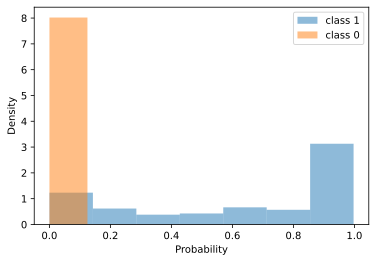

In [56]:
#Посмотрим, как распределяются эти вероятности. Для этого построим две гистограммы. В первом случае будем смотреть на распределение вероятностей на объектах, принадлежащих классу 1, а во втором - на объектах класса 0.
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.hist(y_pred_proba[y_test == 1], bins=7, density=True, label='class 1', alpha=0.5)
plt.hist(y_pred_proba[y_test == 0], bins=7, density=True, label='class 0', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")

plt.legend()

In [57]:
#Построим ROC-кривую.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

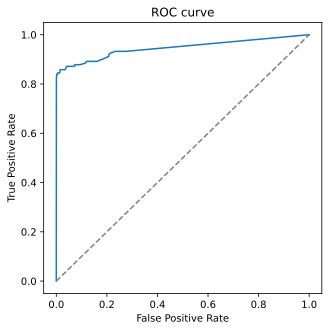

In [58]:
plt.rcParams['figure.figsize'] = 5, 5
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [59]:
#Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

## *Дополнительные задания:

### 1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [60]:
from sklearn.datasets import load_wine
data = load_wine()

### 2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [61]:
type(data)

sklearn.utils.Bunch

In [62]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

### 3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [63]:
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [64]:
#Сколько классов содержит целевая переменная датасета? Выведите названия классов.
print(data['target_names'])

['class_0' 'class_1' 'class_2']


*Видим 3 класса, с названиями 'class_0' 'class_1' 'class_2'*

### 5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [65]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [66]:
X.shape

(178, 13)

*Мы видим, что это массив из 178 строк и 13 столбцов.*

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

*Как видно из этой информации, данная таблица не содержит пропущенных значений.*

### 7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [68]:
X = X.assign(target=data['target'])
X['target'] = X['target'].astype(np.int64)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### 8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

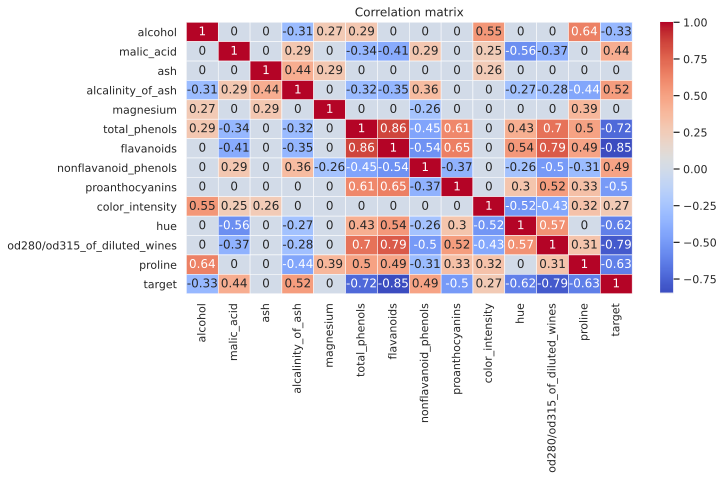

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (10,5))

sns.set(font_scale=1)

X_corr = X.corr()
X_corr = np.round(X_corr, 2)
X_corr[np.abs(X_corr) < 0.25] = 0

sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

### 9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [70]:
high_corr = np.array(X_corr.loc[np.abs(X_corr['target']) > 0.5, ['target']].drop(['target']).index)
print(high_corr)

['alcalinity_of_ash' 'total_phenols' 'flavanoids' 'hue'
 'od280/od315_of_diluted_wines' 'proline']


### 10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [71]:
X = X.drop(['target'], axis=1)

In [72]:
high_corr = [[index, f'{index}_2'] for index in high_corr]
high_corr

[['alcalinity_of_ash', 'alcalinity_of_ash_2'],
 ['total_phenols', 'total_phenols_2'],
 ['flavanoids', 'flavanoids_2'],
 ['hue', 'hue_2'],
 ['od280/od315_of_diluted_wines', 'od280/od315_of_diluted_wines_2'],
 ['proline', 'proline_2']]

In [73]:
for index in high_corr:
    X[index[1]] = X[index[0]]**2

In [74]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0


In [75]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06


In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   alcohol                         178 non-null    float64
 1   malic_acid                      178 non-null    float64
 2   ash                             178 non-null    float64
 3   alcalinity_of_ash               178 non-null    float64
 4   magnesium                       178 non-null    float64
 5   total_phenols                   178 non-null    float64
 6   flavanoids                      178 non-null    float64
 7   nonflavanoid_phenols            178 non-null    float64
 8   proanthocyanins                 178 non-null    float64
 9   color_intensity                 178 non-null    float64
 10  hue                             178 non-null    float64
 11  od280/od315_of_diluted_wines    178 non-null    float64
 12  proline                         178 